In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import cv2
import matplotlib.pyplot as plt
from collections import Counter

load dataset

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

In [5]:
DATA_DIR=('/content/drive/MyDrive/Animals')

In [6]:
def load_image(DATA_DIR):
  catagories=os.listdir(DATA_DIR)
  return catagories

Convert into gray scale

In [7]:
def load_images_and_labels(data_dir, target_size=(64, 64)):
    data, labels = [], []
    categories = os.listdir(data_dir)
    for category in categories:
        category_path = os.path.join(data_dir, category)
        label = categories.index(category)
        for file_name in os.listdir(category_path):
            file_path = os.path.join(category_path, file_name)
            try:
                img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
                img = cv2.resize(img, target_size)
                data.append(img.flatten())  # Flatten image for k-NN
                labels.append(label)
            except Exception as e:
                print(f"Error loading image {file_path}: {e}")
    return np.array(data), np.array(labels)


In [8]:
images, labels = load_images_and_labels(DATA_DIR)
print("Data loaded successfully!")
print(f"Image Shape: {images.shape}, Labels Shape: {labels.shape}")




Data loaded successfully!
Image Shape: (170, 4096), Labels Shape: (170,)


Calculate Euclidean Distance

In [16]:
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))


k-NN classifier function

In [10]:
def knn_predict(test_sample, train_data, train_labels, k):
    distances = [euclidean_distance(test_sample, x) for x in train_data]
    k_neighbors = np.argsort(distances)[:k]
    k_neighbor_labels = [train_labels[i] for i in k_neighbors]
    most_common = Counter(k_neighbor_labels).most_common(1)
    return most_common[0][0]


k-Fold Cross Validation and Accuracy Calculation

In [11]:
def knn_cross_validation(X, y, k_values):
    kf = KFold(n_splits=5)
    avg_accuracies = []

    for k in k_values:
        fold_accuracies = []

        for train_index, val_index in kf.split(X):
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]

            correct_predictions = 0
            for i, test_sample in enumerate(X_val):
                prediction = knn_predict(test_sample, X_train, y_train, k)
                if prediction == y_val[i]:
                    correct_predictions += 1

            fold_accuracy = correct_predictions / len(y_val)
            fold_accuracies.append(fold_accuracy)

        avg_accuracy = np.mean(fold_accuracies)
        avg_accuracies.append(avg_accuracy)

    return avg_accuracies
def knn_cross_validation(X, y, k_values):
    kf = KFold(n_splits=5)
    avg_accuracies = []

    for k in k_values:
        fold_accuracies = []

        for train_index, val_index in kf.split(X):
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]

            correct_predictions = 0
            for i, test_sample in enumerate(X_val):
                prediction = knn_predict(test_sample, X_train, y_train, k)
                if prediction == y_val[i]:
                    correct_predictions += 1

            fold_accuracy = correct_predictions / len(y_val)
            fold_accuracies.append(fold_accuracy)

        avg_accuracy = np.mean(fold_accuracies)
        avg_accuracies.append(avg_accuracy)

    return avg_accuracies


Run k-NN Cross-validation

In [14]:
k_values = [1, 3, 5, 7, 9]  # Test different k values
avg_accuracies = knn_cross_validation(images, labels, k_values)


Result

Average accuracy for k=1: 0.0941
Average accuracy for k=3: 0.0647
Average accuracy for k=5: 0.0412
Average accuracy for k=7: 0.0353
Average accuracy for k=9: 0.0353


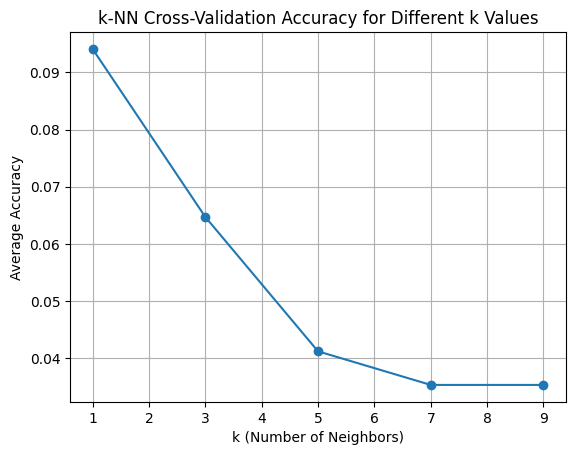

In [17]:
for k, accuracy in zip(k_values, avg_accuracies):
    print(f"Average accuracy for k={k}: {accuracy:.4f}")

# Optionally, plot the results
plt.plot(k_values, avg_accuracies, marker='o')
plt.title('k-NN Cross-Validation Accuracy for Different k Values')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Average Accuracy')
plt.grid(True)
plt.show()